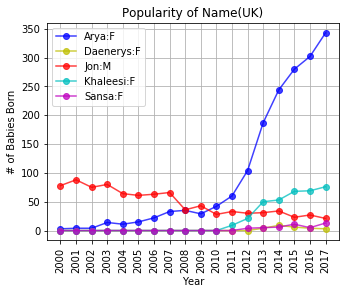

In [48]:
%matplotlib inline
import pandas as pd
import numpy as np
from pandas import ExcelWriter
from pandas import ExcelFile 
from matplotlib import pyplot as plt
import requests
from scipy import stats

boys_df_xlsx = pd.read_excel('UK baby names/allbabynames1996to2017.xls',header=[2],sheet_name='Boys')

boys_df_xlsx.loc[0] = boys_df_xlsx.iloc[0].fillna(method='ffill')

boys_df_xlsx.columns=pd.MultiIndex.from_arrays(boys_df_xlsx[:2].values)

# #if nan try not to hard code
boys_df_xlsx = boys_df_xlsx.iloc[2:15233]
boys_df = boys_df_xlsx.drop('Rank', axis=1, level=1)
boys_df.columns=boys_df.columns.droplevel(1)
# # boys_df.reset_index()

boys_df.columns = boys_df.columns.astype(str)
boys_df.rename(columns={'nan':'Names'}, inplace=True)
boys_df.columns = boys_df.columns.str.split(".", 0).str[0]
boys_df.replace(':',0,inplace=True)
boys_df['gender'] = "M"

girls_df_xlsx = pd.read_excel('UK baby names/allbabynames1996to2017.xls',header=[2],sheet_name='Girls')
girls_df_xlsx.loc[0] = girls_df_xlsx.iloc[0].fillna(method='ffill')
girls_df_xlsx.columns=pd.MultiIndex.from_arrays(girls_df_xlsx[:2].values)
girls_df_xlsx = girls_df_xlsx.iloc[2:19974]
girls_df = girls_df_xlsx.drop('Rank', axis=1, level=1)
girls_df.columns=girls_df.columns.droplevel(1)
# # boys_df.reset_index()

girls_df.columns = girls_df.columns.astype(str)
girls_df.rename(columns={'nan':'Names'}, inplace=True)
girls_df.columns = girls_df.columns.str.split(".", 0).str[0]
girls_df.replace(':',0,inplace=True)
girls_df['gender'] = "F"
# a list to hold all instances where Arya is Female in .txt files. Loop through this list to create scatter plot
# add (name, gender, color) to got_names list to add to scatter plot
got_names_list = [("Arya","F","b"),
            # ("Arya","M","b"),
             ("Daenerys","F","y"),
             ("Jon","M","r"),
             ("Khaleesi","F","c"),
             ("Sansa","F","m")
            ]

names_UK = pd.concat([girls_df, boys_df])
names_UK["Names"] = names_UK["Names"].str.strip()
#names_UK = names_UK.set_index("Names")
#print(names_UK["Names"])
#names_UK.to_csv('names_UK.csv')
names_UKT = pd.melt(names_UK, id_vars=['Names','gender'], value_vars=['1996', '1997', '1998',
'1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', 
'2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017'])
names_UKT.rename(columns={'variable':'year',
                             'value' : 'count_names'}, inplace=True)
names_UKT
#names_UKT.to_csv('all_names_UKT.csv')

got_names = [item[0].upper() for item in got_names_list ]
#print(got_names)
got_names_UK  = names_UK.loc[names_UK["Names"].isin(got_names)]
#got_names_UK = got_names_UK.set_index("Names")
year = sorted(list(got_names_UK))
#print(year)
got_names_UK
#got_names_UK = got_names_UK.drop('gender', axis=1)
got_names_UKT = pd.melt(got_names_UK, id_vars=['Names','gender'], value_vars=['2000', '2001', '2002', '2003', '2004', '2005', '2006', 
'2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017'])
got_names_UKT
#got_names_UKT.to_csv('got_names_UKT.csv')
got_names_UKT.rename(columns={'variable':'year',
                             'value' : 'count_names'}, inplace=True)
#Get data for Urban by filtering on index
#print(got_names)
handles = []
for i in got_names_list:
    plotting = got_names_UKT.loc[(got_names_UKT["Names"]==i[0].upper()) & (got_names_UKT["gender"]==i[1]) ]
    #print(plotting)
#Daenerys = got_names_UKT.loc[got_names_UKT["Names"]== "DAENERYS"]
    x_axis = plotting.year
    y_axis = plotting.count_names
    handles.append(plt.plot(x_axis,y_axis,
                marker="o",
                     c=i[2],
                     label=i[0]+':'+i[1],
                     alpha=0.75 ))
    
plt.xticks(rotation=90)
plt.title("Popularity of Name(UK)")
plt.xlabel("Year")
plt.ylabel("# of Babies Born")
#print("here")
plt.grid()
plt.legend(loc='best')
plt.subplots_adjust(right=0.8)
plt.savefig("mixed_GOT_names_UK.png")
plt.show()

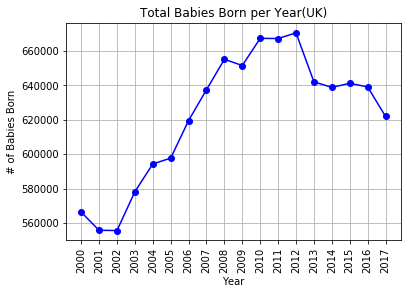

In [49]:
#plt.bar(x_axis,members, color = "bgr", align="center",tick_label = gyms)

names_UKT_df = pd.DataFrame({
                    'total_babies' : names_UKT.groupby(['year'])['count_names'].sum()})
names_UKT_df = names_UKT_df[4:]

plt.plot(names_UKT_df.index.values, names_UKT_df['total_babies'], marker='o', c="b")
plt.xticks(rotation=90)
plt.title("Total Babies Born per Year(UK)")
plt.xlabel("Year")
plt.ylabel("# of Babies Born")
plt.grid()
plt.savefig("total_baby_names_UK.png")
plt.show()
#interesting note: Sharp change in babies born per year around '13. 

In [50]:
boys_df_rank = boys_df_xlsx.drop('Count', axis=1, level=1)
boys_df_rank.columns=boys_df_rank.columns.droplevel(1)
# # boys_df.reset_index()

boys_df_rank.columns = boys_df_rank.columns.astype(str)
boys_df_rank.rename(columns={'nan':'Names'}, inplace=True)
boys_df_rank.columns = boys_df_rank.columns.str.split(".", 0).str[0]
boys_df_rank.replace(':',0,inplace=True)
boys_df_rank['gender'] = "M"

girls_df_rank = girls_df_xlsx.drop('Count', axis=1, level=1)
girls_df_rank.columns=girls_df_rank.columns.droplevel(1)
# # boys_df.reset_index()

girls_df_rank.columns = girls_df_rank.columns.astype(str)
girls_df_rank.rename(columns={'nan':'Names'}, inplace=True)
girls_df_rank.columns = girls_df_rank.columns.str.split(".", 0).str[0]
girls_df_rank.replace(':',0,inplace=True)
girls_df_rank['gender'] = "F"
# a list to hold all instances where Arya is Female in .txt files. Loop through this list to create scatter plot
# add (name, gender, color) to got_names list to add to scatter plot
names_UK_rank = pd.concat([girls_df, boys_df])
names_UK_rank["Names"] = names_UK["Names"].str.strip()
#names_UK = names_UK.set_index("Names")
#names_UK_rank
names_UK_rank = pd.melt(names_UK, id_vars=['Names','gender'], value_vars=['1996', '1997', '1998',
'2000', '2001', '2002', '2003', '2004', '2005', '2006', 
'2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017'])
names_UK_rank.rename(columns={'variable':'year',
                              'value' : 'Rank'}, inplace=True)
#names_UK_rank.to_csv('all_names_UK_rank.csv')
names_UK_rank
# got_names = [item[0].upper() for item in got_names_list ]
# #print(got_names)
# got_names_UK  = names_UK.loc[names_UK["Names"].isin(got_names)]
# #got_names_UK = got_names_UK.set_index("Names")
year = names_UK_rank['year'].unique()
#print(year)
#names_UK_rank
arya_rank_df = names_UK_rank.loc[(names_UK_rank["Names"]=="ARYA") & (names_UK_rank["year"]== '2011') & (names_UK_rank["gender"]== "F")]
arya_ranks_df = names_UK_rank.loc[(names_UK_rank["Rank"] == 60 ) & (names_UK_rank["year"]== '2011')]
top5_arya_df = arya_ranks_df[:7]
top5_arya_df
#top5 = top5_arya_df['Names'].values
#print(top5)


,Names,gender,year,Rank
494948,ARYA,F,2011,60
497685,DULCIE,F,2011,60
498099,ELLA-MAE,F,2011,60
499104,FEARNE,F,2011,60
501232,JAZMINE,F,2011,60
504551,MAHNOOR,F,2011,60
506121,NAIMA,F,2011,60


In [51]:
Arya_regres_Fdf = names_UKT.loc[(names_UKT["Names"]=="ARYA") & (names_UKT["gender"]=="F") & (names_UKT["year"].astype(int) >= 2003) ]
Arya_regres_Fdf
pfvalue = stats.linregress(Arya_regres_Fdf["year"].astype(int),Arya_regres_Fdf["count_names"])
ARYA_Female_pvalue = f"ARYA p value for female: {pfvalue.pvalue}"
print(ARYA_Female_pvalue)

ARYA p value for female: 2.4207357075846425e-06


In [52]:
Arya_regres_Mdf = names_UKT.loc[(names_UKT["Names"]=="ARYA") & (names_UKT["gender"]=="M") & (names_UKT["year"].astype(int) >= 2003)]
Arya_regres_Mdf
#slope, intercept, rvalue,p_value, stderr 
pmvalue= stats.linregress(Arya_regres_Mdf["year"].astype(int),Arya_regres_Mdf["count_names"])
ARYA_Male_pvalue = f"ARYA p value for male: {pmvalue.pvalue}"
print(ARYA_Male_pvalue)


ARYA p value for male: 0.9379491729181968


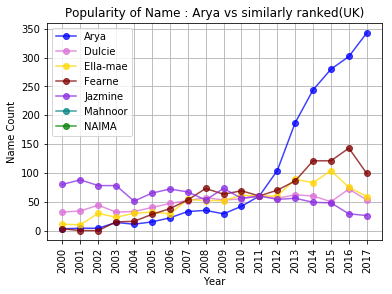

In [55]:
top5_names_list = [("Arya","F","b"),
             ("Dulcie","F","orchid")
             ,("Ella-mae","F","gold"),
             ("Fearne","F","maroon"),
             ("Jazmine","F","blueviolet"),
            ("Mahnoor","F", "teal"),
            ("NAIMA","F", "green"),       
            ]

arya_trend_list = [item.upper() for item in top5 ]
#print(arya_trend_list)
#names_UK
arya5_names_UK  = names_UK.loc[names_UK["Names"].isin(arya_trend_list)]
arya5_names_UK
#got_names_UK = got_names_UK.set_index("Names")
year = sorted(list(arya5_names_UK))
#print(year)
# got_names_UK
#got_names_UK = got_names_UK.drop('gender', axis=1)
arya5_names_UKT = pd.melt(arya5_names_UK, id_vars=['Names','gender'], value_vars=[ '2000', '2001', '2002', '2003', '2004', '2005', '2006', 
'2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017'])
arya5_names_UKT
#arya5_names_UKT.to_csv('arya5_names_UK.csv')
arya5_names_UKT.rename(columns={'variable':'year',
                             'value' : 'count_names'}, inplace=True)
#Get data for Urban by filtering on index
#print(got_names)
handles = []
for i in top5_names_list:
    plotting = arya5_names_UKT.loc[(arya5_names_UKT["Names"]==i[0].upper()) & (arya5_names_UKT["gender"]==i[1]) ]
    #print(plotting)
#Daenerys = got_names_UKT.loc[got_names_UKT["Names"]== "DAENERYS"]
    x_axis = plotting.year
    y_axis = plotting.count_names
    handles.append(plt.plot(x_axis,y_axis,
                marker="o",
                     c=i[2],
                     label=i[0],
                     alpha=0.75 ))
    
    
plt.xticks(rotation=90)
plt.title("Popularity of Name : Arya vs similarly ranked(UK)")
plt.xlabel("Year")
plt.ylabel("Name Count")
#print("here")
plt.grid()

plt.legend(loc='best')
# plt.subplots_adjust(right=0.8)
#plt.fig(figsize=(30,30))
#plt.text(1, 180,"ARYA-F (p_value): 2.4207357075846425e-06\nARYA-M (p_value): 0.9379491729181968", fontsize=10)

plt.savefig("arya_vs_similarly_ranked_UK.png")
plt.show()

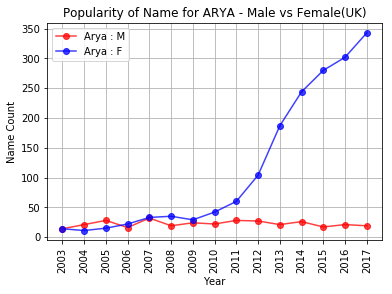

In [56]:
plt.plot(Arya_regres_Mdf["year"],Arya_regres_Mdf["count_names"],
                marker="o",
                     color="r",
                     label= "Arya : M",
                     alpha=0.75 )
plt.plot(Arya_regres_Fdf["year"],Arya_regres_Fdf["count_names"],
                marker="o",
                     color="b",
                     label= "Arya : F",
                     alpha=0.75 )
plt.xticks(rotation=90)
plt.title("Popularity of Name for ARYA - Male vs Female(UK)")
plt.xlabel("Year")
plt.ylabel("Name Count")
#print("here")
plt.grid()
plt.legend(loc='best')
# plt.subplots_adjust(right=0.8)
#plt.figure(figsize=(30,30))
plt.savefig("arya_male_vs_female_UK.png")
plt.show()